# Drug Classification
This database contains information about certain drug types.

The target feature is
- Drug type

The feature sets are:
- Age
- Sex
- Blood Pressure Levels (BP)
- Cholesterol Levels
- Na to Potassium Ration

Kaggle Link: https://www.kaggle.com/datasets/prathamtripathi/drug-classification/discussion

# Importing The Libraries

In [1]:
# Import all the tools we need

# Regular EDA (exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Data Preprocessing 
from sklearn import preprocessing

# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluations
from sklearn.feature_selection import f_regression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

# Ignore Warning 
import warnings
warnings.filterwarnings('ignore')

# Importing The Data 

In [2]:
df = pd.read_csv("/kaggle/input/drug-classification/drug200.csv")
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


# Preprocessing Categorical Columns 

In [3]:
df['Drug'].nunique()

5

In [4]:
df['Drug'].unique()

array(['DrugY', 'drugC', 'drugX', 'drugA', 'drugB'], dtype=object)

In [5]:
df['Cholesterol'].unique()

array(['HIGH', 'NORMAL'], dtype=object)

In [6]:
df["BP"].unique()

array(['HIGH', 'LOW', 'NORMAL'], dtype=object)

In [7]:
df['Sex'].unique()

array(['F', 'M'], dtype=object)

In [8]:
le1 = preprocessing.LabelEncoder()
df['Drug']= le1.fit_transform(df['Drug'])
df['Cholesterol']= le1.fit_transform(df['Cholesterol'])
df['BP']= le1.fit_transform(df['BP'])
df['Sex']= le1.fit_transform(df['Sex'])

In [9]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,0
1,47,1,1,0,13.093,3
2,47,1,1,0,10.114,3
3,28,0,2,0,7.798,4
4,61,0,1,0,18.043,0


In [10]:
len(df)

200

# Exploring The Data 

# Inference 1: 
I think that Drug 0 has higher usage than the rest... 

Possible Reasons:
- Data is biased in the dataset 
- Drug 0 is widely available or most effective or has less side effect or other medical reasons.

This cannot be cleared for now as we need medical professionals to handle this and to give more insights about the other drugs. 

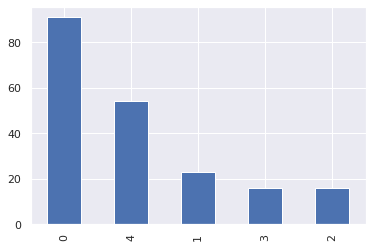

In [11]:
df["Drug"].value_counts().plot(kind="bar");

# Inference 2: 
Data Distribution over high and normal cholesterol levels are similar. That's good!

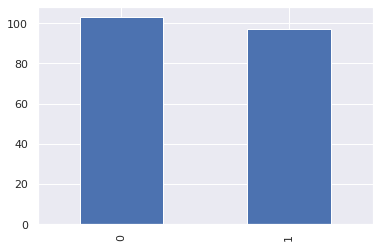

In [12]:
df["Cholesterol"].value_counts().plot(kind="bar");

# Inference 3: 
Data Distribution over the feature BP is also similar. 

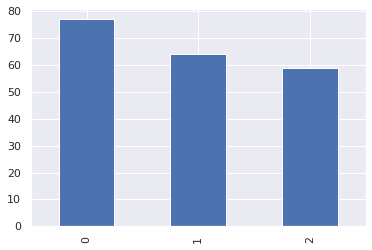

In [13]:
df["BP"].value_counts().plot(kind="bar");

# Inference 4: 
Data distribution over the sex feature is also similar. 

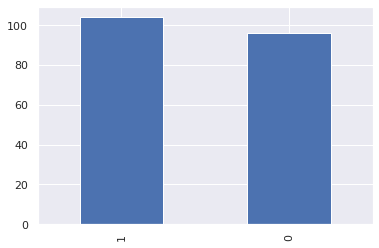

In [14]:
df["Sex"].value_counts().plot(kind="bar");

In [15]:
# Data columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    int64  
 2   BP           200 non-null    int64  
 3   Cholesterol  200 non-null    int64  
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    int64  
dtypes: float64(1), int64(5)
memory usage: 9.5 KB


In [16]:
# Are there any missing values?
df.isna().sum()
# There are none!

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [17]:
df.describe()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,44.315000,0.520000,0.910000,0.485000,16.084485,1.595000
std,16.544315,0.500854,0.821752,0.501029,7.223956,1.716305
min,15.000000,0.000000,0.000000,0.000000,6.269000,0.000000
25%,31.000000,0.000000,0.000000,0.000000,10.445500,0.000000
50%,45.000000,1.000000,1.000000,0.000000,13.936500,1.000000
75%,58.000000,1.000000,2.000000,1.000000,19.380000,4.000000
max,74.000000,1.000000,2.000000,1.000000,38.247000,4.000000


# Deeper Exploration 

# 1. Drug Vs Sex

In [18]:
pd.crosstab(df["Drug"], df["Sex"])

Sex,0,1
Drug,,
0,47,44
1,9,14
2,6,10
3,7,9
4,27,27


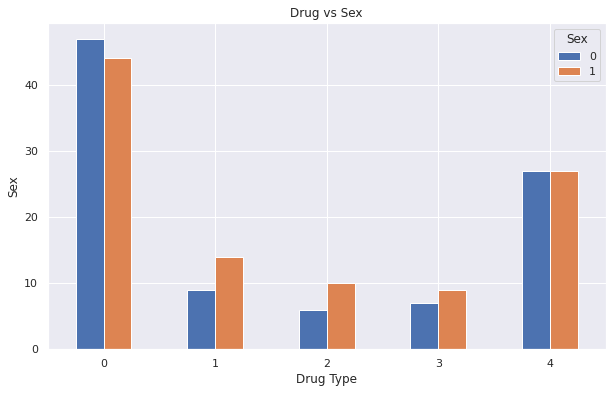

In [19]:
pd.crosstab(df["Drug"], df["Sex"]).plot(kind="bar",
                                   figsize=(10, 6))
plt.title("Drug vs Sex")
plt.xlabel("Drug Type")
plt.ylabel("Sex")
plt.xticks(rotation=0);

## Inference: 
- Drug 0 is not only the higgest usage, but it is also has it's distribution equal among male and female. 
- And the other drugs are also almost equally distributed among the genders male and female. 

# 2. Drug Vs BP

In [20]:
pd.crosstab(df["Drug"], df["BP"])

BP,0,1,2
Drug,,,
0,38,30,23
1,23,0,0
2,16,0,0
3,0,16,0
4,0,18,36


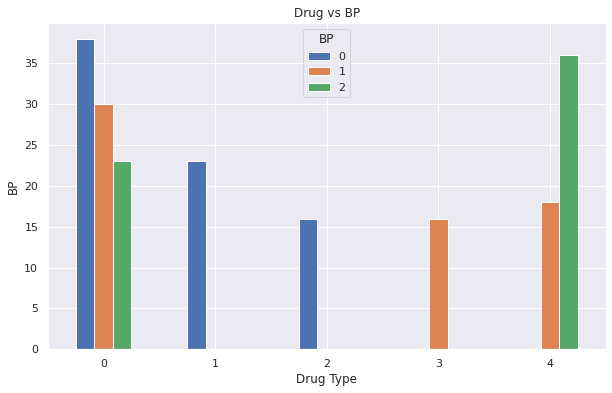

In [21]:
# Compare bp column with sex column
pd.crosstab(df["Drug"], df["BP"]).plot(kind="bar",
                                   figsize=(10, 6))
plt.title("Drug vs BP")
plt.xlabel("Drug Type")
plt.ylabel("BP")
plt.xticks(rotation=0);

## Inference: 
There is a high bias of medicines. Again this could be of 2 reasons. (Less data or medical reasons)

- BP Type 0 -> Drug 0,1,2
- BP Type 1 -> Drug 0,3,4
- BP Type 3 -> Drug 0,4

This can help in manual classification. But nevertheless, BP is a highly important feature...

# 3. Drug Vs Cholesterol

In [22]:
pd.crosstab(df["Drug"], df["Cholesterol"])

Cholesterol,0,1
Drug,,
0,47,44
1,12,11
2,8,8
3,16,0
4,20,34


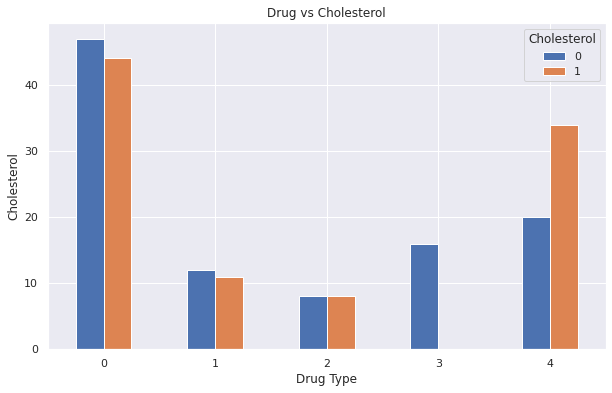

In [23]:
# Compare cholesterol column with sex column
pd.crosstab(df["Drug"], df["Cholesterol"]).plot(kind="bar",
                                   figsize=(10, 6))
plt.title("Drug vs Cholesterol")
plt.xlabel("Drug Type")
plt.ylabel("Cholesterol")
plt.xticks(rotation=0);

## Inference:
Simple yet unique.
- Cholesterol Type 1 cannot have Drug Type 3

# 4. Other Crosstabs

In [24]:
pd.crosstab(df["Sex"], df["Cholesterol"])

Cholesterol,0,1
Sex,,
0,49,47
1,54,50


In [25]:
pd.crosstab(df["Sex"], df["BP"])

BP,0,1,2
Sex,,,
0,38,28,30
1,39,36,29


In [26]:
pd.crosstab(df["Cholesterol"], df["BP"])

BP,0,1,2
Cholesterol,,,
0,35,31,37
1,42,33,22


# 5. Heatmap

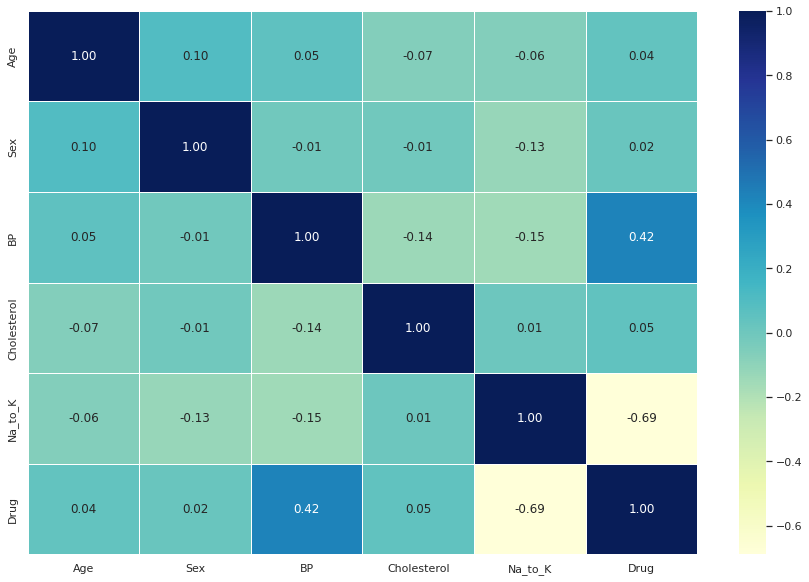

In [27]:
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix, 
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");

# Train Test Spilit 

In [28]:
# Split data into train and test sets
np.random.seed(42)

# Split into train & test set
X_train, X_test, y_train, y_test = train_test_split(df.drop("Drug", axis = 1),
                                                    df["Drug"],
                                                    test_size=0.1)

In [29]:
x = df.drop("Drug", axis = 1)
y = df["Drug"]

p_values = f_regression(x,y)[1]
len(p_values)

5

In [30]:
l = []

col = list(df.columns)
iter_df = 0

for value in p_values:
    if col[iter_df] == "close":
        iter_df += 1
        
    l.append({col[iter_df] : value.round(3)})
    iter_df += 1
    
l

[{'Age': 0.556},
 {'Sex': 0.798},
 {'BP': 0.0},
 {'Cholesterol': 0.496},
 {'Na_to_K': 0.0}]

# ML Modelling 

In [31]:
# Put models in a dictionary
models = {"KNN": KNeighborsClassifier(),
          "Random Forest": RandomForestClassifier()}

# Create a function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of differetn Scikit-Learn machine learning models
    X_train : training data (no labels)
    X_test : testing data (no labels)
    y_train : training labels
    y_test : test labels
    """
    # Set random seed
    np.random.seed(42)
    # Make a dictionary to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [32]:
model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)

model_scores

{'KNN': 0.6, 'Random Forest': 1.0}

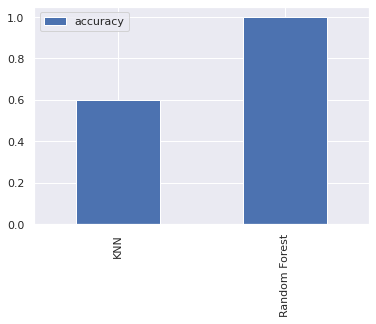

In [33]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar();

# Hyperparameter Tuning - KNN

In [34]:
# Let's tune KNN

train_scores = []
test_scores = []

# Create a list of differnt values for n_neighbors
neighbors = range(1, 21)

# Setup KNN instance
knn = KNeighborsClassifier()

# Loop through different n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors=i)
    
    # Fit the algorithm
    knn.fit(X_train, y_train)
    
    # Update the training scores list
    train_scores.append(knn.score(X_train, y_train))
    
    # Update the test scores list
    test_scores.append(knn.score(X_test, y_test))

Maximum KNN score on the test data: 75.00%


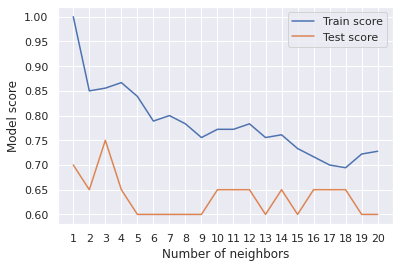

In [35]:
plt.plot(neighbors, train_scores, label="Train score")
plt.plot(neighbors, test_scores, label="Test score")
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()

print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}%")

# Hyperparameter Tuning - Random Forest Regressor

In [36]:
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

In [37]:
# Setup random seed
np.random.seed(42)

# Setup random hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(), 
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True)

# Fit random hyperparameter search model for RandomForestClassifier()
rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [38]:
rs_rf.best_params_

{'n_estimators': 510,
 'min_samples_split': 14,
 'min_samples_leaf': 1,
 'max_depth': None}

In [39]:
rs_rf.score(X_test, y_test)

1.0

# Final Result

Random Forest Regressor outperforms the KNN algorithm. Thus Random Forest Regressor is used for further evaluating...

In [40]:
y_preds = rs_rf.predict(X_test)

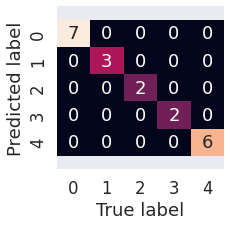

In [41]:
sns.set(font_scale=1.5)

def plot_conf_mat(y_test, y_preds):
    """
    Plots a nice looking confusion matrix using Seaborn's heatmap()
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True,
                     cbar=False)
    plt.xlabel("True label")
    plt.ylabel("Predicted label")
    
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)
    
plot_conf_mat(y_test, y_preds)

In [42]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         2
           4       1.00      1.00      1.00         6

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



# Upvote if you like it ✨